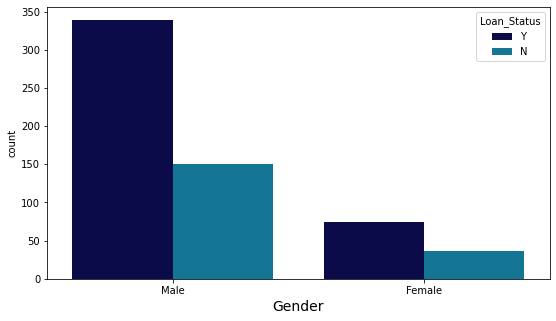

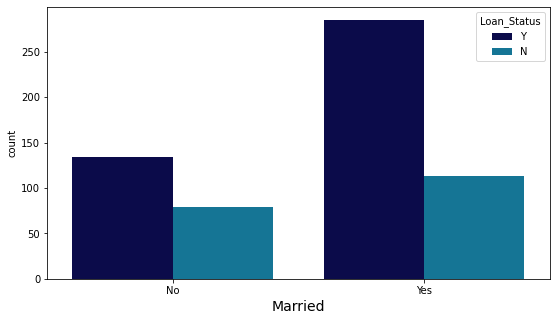

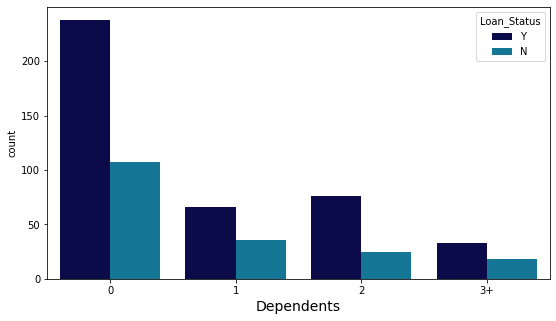

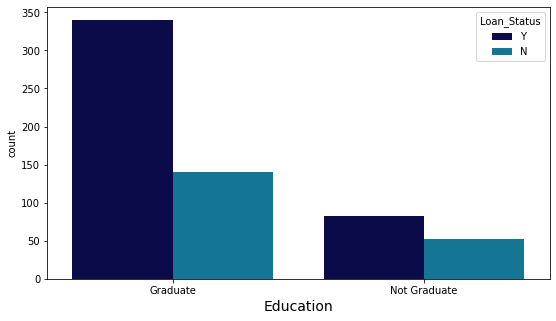

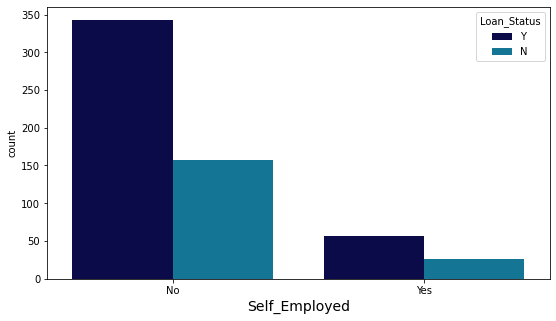

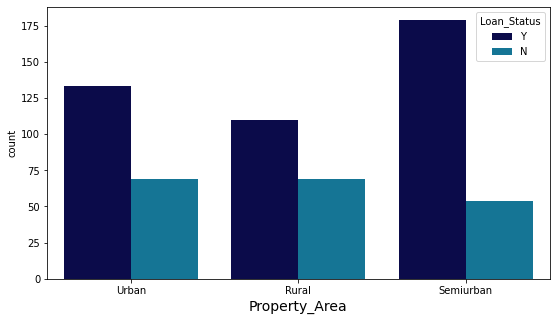

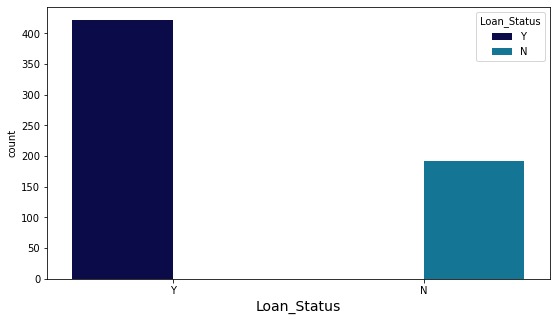

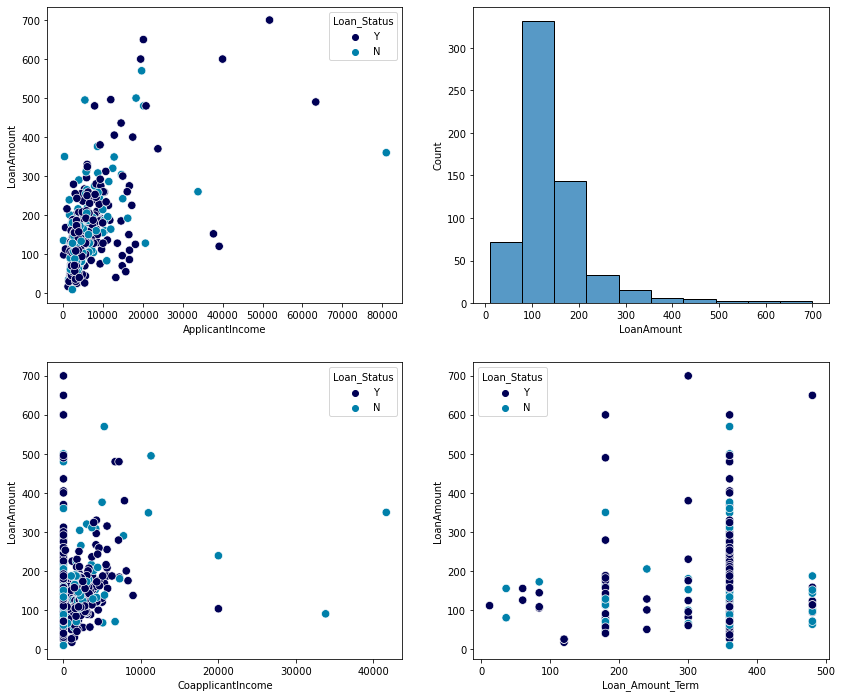

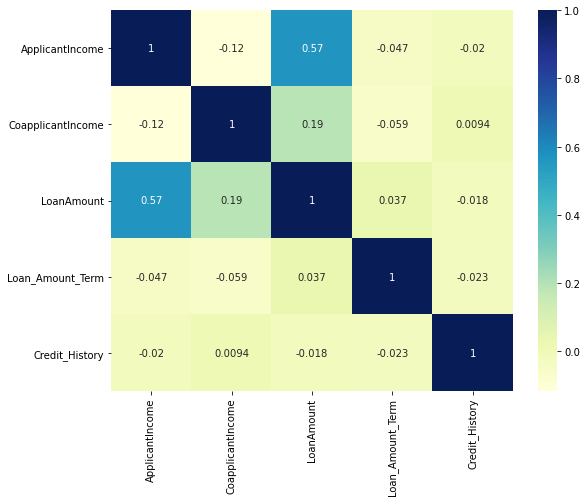

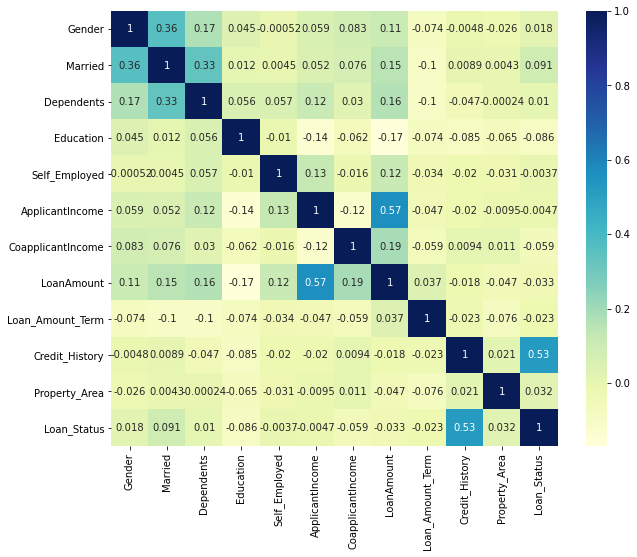

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train_data = 'train_loan_data.csv'
test_data = 'test_loan_data.csv'
loan_train = pd.read_csv(train_data)
loan_test = pd.read_csv(test_data)
loan_train_copy = loan_train.copy()

# Handle the missing data // Data Cleaning & Preparation
loan_train['Credit_History'].fillna(method='ffill', inplace=True)
loan_train['Loan_Amount_Term'].fillna((loan_train['Loan_Amount_Term'].median()), inplace=True)
loan_train['LoanAmount'].fillna((loan_train['LoanAmount'].median()), inplace=True)
loan_train['Self_Employed'].fillna('No', inplace=True)
loan_train['Dependents'].fillna(0, inplace=True)
loan_train['Married'].fillna('Yes', inplace=True)
loan_train['Gender'].fillna('Male', inplace=True)
loan_test['Credit_History'].fillna(method='ffill', inplace=True)
loan_test['Loan_Amount_Term'].fillna((loan_test['Loan_Amount_Term'].median()), inplace=True)
loan_test['LoanAmount'].fillna((loan_test['LoanAmount'].median()), inplace=True)
loan_test['Self_Employed'].fillna('No', inplace=True)
loan_test['Dependents'].fillna(0, inplace=True)
loan_test['Married'].fillna('Yes', inplace=True)
loan_test['Gender'].fillna('Male', inplace=True)

# Data Visualization
categorical_columns = loan_train_copy.select_dtypes('object').columns.to_list()
for i in categorical_columns[1:]:
    plt.figure(figsize=(9,5))
    sns.countplot(x=i ,hue='Loan_Status', data=loan_train_copy, palette='ocean')
    plt.xlabel(i, fontsize=14)

fig, ax = plt.subplots(2,2, figsize=(14,12))

sns.scatterplot(data=loan_train,x="ApplicantIncome", y="LoanAmount",s=70, hue="Loan_Status", palette='ocean',ax=ax[0,0])
sns.histplot(loan_train, x=loan_train['LoanAmount'], bins=10, ax=ax[0,1])
sns.scatterplot(data=loan_train,x='CoapplicantIncome', y='LoanAmount',s=70, hue='Loan_Status',palette='ocean', ax=ax[1,0])
sns.scatterplot(data=loan_train,x='Loan_Amount_Term', y='LoanAmount', s=70, hue='Loan_Status',palette='ocean', ax=ax[1,1])

fig, ax = plt.subplots(figsize=(9, 7))
correlations = loan_train.corr()

dataplot = sns.heatmap(correlations, cmap="YlGnBu", annot=True)

# Data Pre-Processing
le = LabelEncoder()
objectlist_train = loan_train.select_dtypes(include = "object").columns
for feature in objectlist_train:
    loan_train[feature] = le.fit_transform(loan_train[feature].astype(str))
objectlist_test = loan_test.select_dtypes(include='object').columns
for feature in objectlist_test:
    loan_test[feature] = le.fit_transform(loan_test[feature].astype(str))

fig, ax = plt.subplots(figsize=(10, 8))
correlations_ML = loan_train.iloc[:,1:].corr()
sns.heatmap(correlations_ML, cmap="YlGnBu", annot=True)


plt.show()



In [2]:
# Machine Learning Model
x = loan_train.iloc[:,1:].drop('Loan_Status', axis=1)
y = loan_train['Loan_Status']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state=0)

# Decision Tree Classifier Model
df_model = DecisionTreeClassifier()
df_model.fit(train_x, train_y)
predict_y = df_model.predict(test_x)
print("Decision Tree Accuracy:", accuracy_score(predict_y, test_y))

# Random Forest CLassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(train_x, train_y)
predict_y2 = rf_model.predict(test_x)
print("Random Forest Accuracy:", accuracy_score(predict_y2, test_y))

# Logistic Regression Model
lr_model = LogisticRegression(solver='lbfgs', multi_class='auto')
lr_model.fit(train_x, train_y)
predict_y3 = lr_model.predict(test_x)
print("Logistic Regression Accuracy:", accuracy_score(predict_y3, test_y))

Decision Tree Accuracy: 0.7891891891891892
Random Forest Accuracy: 0.8054054054054054
Logistic Regression Accuracy: 0.8432432432432433
